<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_04_Continue_Kansverdelingen_Opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labo 04 - Continue Kansverdelingen - Opdracht

Reken met kansen en kansverdelingen wordt toegepast in alle domeinen van ons leven, gaande van het uitrekenen van risico’s, het voorspellen van het weer, inschatten van de impact van een reclamecampagne op de omzetcijfers van een bedrijf, modelleren van de verspreiding van een (computer) virus, etc.

De normaalverdeling is de meest gekende en gebruikte kansverdeling in de statistiek. Het is een continue klokvormige kansverdeling die symmetrisch verloopt rond het gemiddelde . Ze is hoog in het midden, en wordt naar lage en hoge waarden steeds kleiner zonder ooit echt nul te worden.
De bedoeling van deze opdracht is om vlot overweg te kunnen met deze kansverdelingen bij het uitrekenen van kansen en het kunnen bepalen van de verwachte waarden van kansverdelingen.

## Inhoud
    • Kunnen nagaan of een reeks gegevens al dan niet normaal verdeeld zijn.
    • Rekenen met en interpreteren van de normaalverdeling.
    • Kunnen uitrekenen van kansen bij normaalverdeelde data
    

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## Vraag 1
Bereken onderstaande kansen met behulp van Python.

In [5]:
# P(Z < -1,67) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
p = stats.norm.cdf(-1.67)
print(round(p,2))


0.05


In [10]:
# P(Z > 2,56 ) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
p = 1 - stats.norm.cdf(2.56)
print(round(p,2))

0.01


In [6]:
# P(1,34 < Z < 2,34) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
p = stats.norm.cdf(2.34) - stats.norm.cdf(1.34)
print(round(p,2))



0.08


In [7]:
# X~N(50;5)   P(X<60) -normaalverdeling met gemiddelde 50 en standaardafwijking 5
p = stats.norm.cdf(60,50,5)
print(round(p,2))


0.98


In [8]:
# X~N(5;1)   P(X > 2,5) -normaalverdeling met gemiddelde 5 en standaardafwijking 1
p  = 1 - stats.norm.cdf(2.5,5,1)
print(round(p,2))


0.99


In [9]:
# X~N(120;6)   P(114 < X < 126) - normaalverdeling met gemiddelde 120 en standaardafwijking 6
p = stats.norm.cdf(126,120,6) - stats.norm.cdf(114,120,6)
print(round(p,2))

0.68


## Vraag 2

De batterij van de fitbit charge 2 heeft een MTTF (Mean Time To Failure = gemiddelde levensduur) van een bepaald type omvormer bedraagt 24 maanden een standaardafwijking van 6 maanden.
De garantieperiode op een fitbit charge 2 is 1 jaar (12 maanden).


a. Wat is de kans dat een fitbit binnen de garantieperiode stuk gaat?

In [12]:
p = stats.norm.cdf(12,24,6)
print(f"De kans dat een Fitbit binnen de garantieperiode kapot gaat, is: {p*100:.2f}%")

De kans dat een Fitbit binnen de garantieperiode kapot gaat, is: 2.28%


b. Stel dat na 2,5 jaar een koper beslist om de fitbit charge 3 te kopen, wat is de kans dat de fitbit charge 2 niet binnen deze periode kapot gaat?
    

In [15]:
p = stats.norm.sf(30,24,6)
print(f"De kans dat een Fitbit niet kapot gaat binnen een periode van 2,5 jaar is: {p*100:.2f}%")

De kans dat een Fitbit niet kapot gaat binnen een periode van 2,5 jaar is: 15.87%


📘 Wat doen cdf en sf?
cdf(x, loc, scale) = cumulatieve kans dat de waarde kleiner dan of gelijk aan x is →

𝑃
(
𝑋
≤
𝑥
)
P(X≤x)
sf(x, loc, scale) = survival functie =
1
−
cdf
(
𝑥
)
1−cdf(x) = kans dat X groter is dan x →

𝑃
(
𝑋
>
𝑥
)
P(X>x)
✅ In jouw geval:
Je vraagt:

Wat is de kans dat een Fitbit langer meegaat dan 30 maanden?
Dat is:

𝑃
(
𝑋
>
30
)
,
waar
𝑋
∼
𝑁
(
24
,
6
)
P(X>30),waar X∼N(24,6)
Juiste keuze:
python
Copy
Edit
stats.norm.sf(30, 24, 6)
Je gebruikt dus terecht sf, omdat je zoekt naar:

Kans dat X groter is dan 30

c. Wat is de kans dat de fitbit charge 2 kapot gaat tussen de 1 jaar en de 2,5 jaar en je dus niet op de garantie kunt terugvallen?

In [16]:
p = stats.norm.cdf(30,24,6) - stats.norm.cdf(12,24,6)

print(f"De kans dat een Fitbit kapot gaat tussen 1 jaar en 2,5 jaar is: {p*100:.2f}%")



De kans dat een Fitbit kapot gaat tussen 1 jaar en 2,5 jaar is: 81.86%


d. Na hoeveel maand moet je de batterij vervangen om ervoor te zorgen dat je minder dan 10% kans hebt dat je met een kapotte fitbit komt te zitten?

In [19]:
p = stats.norm.ppf(0.1,24,6)
print(f"Na {round(p,2)} maanden moet je de batterij vervangen om ervoor te zorgen dat je minder dan 10% kans hebt dat je met een kapotte fitbit komt te zitten")


Na 16.31 maanden moet je de batterij vervangen om ervoor te zorgen dat je minder dan 10% kans hebt dat je met een kapotte fitbit komt te zitten


Waarom hier ppf gebruiken?
Je wil weten:

"Na hoeveel maanden is al 10% van de batterijen stuk?"

Dat is dus de waarde waarbij 10% van de verdeling aan de linkerkant zit
→ En dat is precies wat ppf(0.1) doet.

Simpele uitleg:
Je zegt eigenlijk:
🕒 “Ik wil een moment kiezen zodat slechts 10% van de batterijen vóór die tijd stuk is.”

Dat moment vind je met ppf(0.1).

Als je isf(0.1) zou gebruiken, zou je juist vragen:
🕒 “Na hoeveel maanden is 90% nog oké?”
→ Komt op hetzelfde neer, maar je formuleert het andersom. Wat wil je weten?	Gebruik je:
Ondergrens: kans dat iets al kapot is	ppf(prob)
Bovengrens: kans dat iets nog goed is	isf(prob)

## Vraag 3

Aan een toelatingsexamen nemen 300 kandidaten deel voor 50 plaatsen. De uitslag is normaal verdeeld. De gemiddelde uitslag bedraagt 65% en de standaardafwijking is 10%.

a. Welk percentage is vereist om aangenomen te worden indien men de 50 besten aanwerft ?

In [21]:
p = stats.norm.isf(50/300,65,10)
print(f"Vereiste score: {p:.2f}")

Vereiste score: 74.67


b. Ann haalt 58 en Joachim 75. Hoeveel kandidaten komen er in de rangschikking tussen Ann en Joachim?


```
je moet 50/300 gebruiken om het hier over 50 plaatsen op de 300 gaan. achteraf * 300 omdat het hierover 300 mensen gaan.


In [24]:
rangschikking = stats.norm.cdf(75,65,10) - stats.norm.cdf(58,65,10)
hoeveelmensen = rangschikking * 300
print(f"{round(hoeveelmensen,0)} zoveel kandidaten komen tussen ann en joachim")

180.0 zoveel kandidaten komen tussen ann en joachim


## Vraag 4

De BMI is een index die de verhouding tussen lengte en gewicht bij een persoon weergeeft. De BMI wordt veel gebruikt om een indicatie te krijgen of er sprake is van overgewicht of ondergewicht.
Om de BMI van een persoon te berekenen deel je zijn/haar gewicht door het kwadraat van de lengte. Het gewicht wordt daarbij uitgedrukt in kilogram, de lengte in meter.
Weegt een persoon bijvoorbeeld 67kg en meet deze persoon 172cm, dan is de BMI gelijk aan:
$\frac{67}{1,72^2}=22,65$

Alhoewel de BMI niet altijd even betrouwbaar is hanteert men volgende tabel om de BMI te interpreteren.

| BMI | Interpretatie |
   ----------------  |  -------------
| 18,5 tot en met 25 | Normaal gewicht |
| 25 tot en met 27 | Licht overgewicht |
| 27 tot en met 30 | Matig overgewicht |
| 30 tot en met 40 | Ernstig overgewicht |
| Meer dan 40      | Ziekelijk overgewicht

Het bestand BMI.csv bevat lengtes en gewichten van personen die tijdens een steekproef werden opgemeten.

a. Teken een histogram van alle BMI waarden en ga na of deze normaal verdeeld zijn. Bepaal daarvoor het gemiddelde en de standaardafwijking. Teken nu bovenop het histogram de theoretische normaalverdeling die overeen komt met het bekomen gemiddelde en de standaardafwijking. Ga ook na of ongeveer 68% van de BMI waarden binnen 1 standaardafwijking van het gemiddelde liggen en ongeveer 95 procent van de BMI waarden binnen de 2 standaardafwijkingen van het gemiddelde.
    
b. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen. Op deze manier kunnen we straks per geslacht aparte conclusies trekken.
    
c. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwen?

d. Hoeveel procent van demannen in de dataset heeft minstens ernstig overgewicht en hoeveel procent vrouwen in de dataset?

e. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met een ernstig overgewicht? En hoeveel procent van de vrouwen?
    
f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht? En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie.
    
g. Ga na of er uitschieters in de dataset aanwezig zijn. Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen van het gemiddelde liggen.

In [5]:
# Inlezen van de dataset
dataset = pd.read_csv('/content/bmi_data_bewerkt.csv')
dataset.head()

,Sex,Age,BMI,Height_m,Weight_kg
0,Female,21,24.2,1.670812,67.652988
1,Female,35,24.8,1.816608,81.723660
2,Female,27,29.5,1.762760,91.627019
3,Male,24,28.4,1.732788,85.226360
4,Female,18,29.1,1.721866,86.399914


Gemiddelde: 25.543430290872617
Standaardafwijking: 2.0816538133898317
Percentage binnen 1 standaardafwijking: 67.60280842527582 %
Percentage binnen 2 standaardafwijkingen: 96.28886659979939 %
Percentage binnen 3 standaardafwijkingen: 99.69909729187563 %


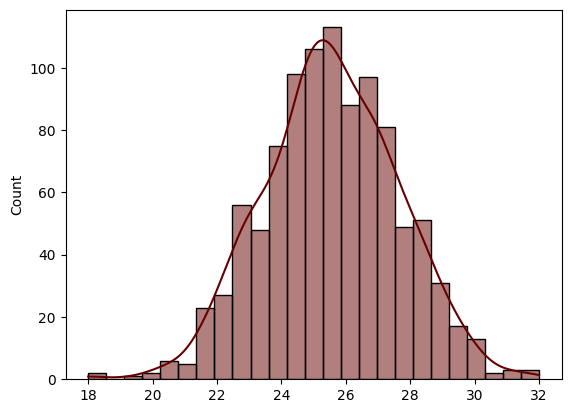

In [6]:
# a. Teken een histogram van alle verkopen en ga na of deze normaal verdeeld zijn.

# Plot een histogram van de BMI-waarden en voeg een KDE-kromme toe
sns.histplot(dataset['BMI'].values, kde=True, color='#660000')

# Bereken het gemiddelde en de standaardafwijking van de BMI-waarden
gemiddelde = dataset['BMI'].mean()
standaardafwijking = dataset['BMI'].std()

print('Gemiddelde:', gemiddelde)
print('Standaardafwijking:', standaardafwijking)

# Percentage waarden binnen 1 standaardafwijking van het gemiddelde
aantal_1_sigma = dataset[(dataset['BMI'] > (gemiddelde - standaardafwijking)) & (dataset['BMI'] < (gemiddelde + standaardafwijking))].BMI.count()
print('Percentage binnen 1 standaardafwijking:', aantal_1_sigma / dataset['BMI'].count() * 100, '%')

# Percentage waarden binnen 2 standaardafwijkingen van het gemiddelde
aantal_2_sigma = dataset[(dataset['BMI'] > (gemiddelde - 2 * standaardafwijking)) & (dataset['BMI'] < (gemiddelde + 2 * standaardafwijking))].BMI.count()
print('Percentage binnen 2 standaardafwijkingen:', aantal_2_sigma / dataset['BMI'].count() * 100, '%')

# Percentage waarden binnen 3 standaardafwijkingen van het gemiddelde
aantal_3_sigma = dataset[(dataset['BMI'] > (gemiddelde - 3 * standaardafwijking)) & (dataset['BMI'] < (gemiddelde + 3 * standaardafwijking))].BMI.count()
print('Percentage binnen 3 standaardafwijkingen:', aantal_3_sigma / dataset['BMI'].count() * 100, '%')


Wat gebeurt hier?
dataset[...]
→ Dit is een filter. We kiezen alleen de rijen (mensen) waar het BMI binnen bepaalde grenzen valt.

dataset['BMI'] > (gemiddelde - standaardafwijking)
→ Is de BMI groter dan (gemiddelde min standaardafwijking)?
Dit is de ondergrens.

dataset['BMI'] < (gemiddelde + standaardafwijking)
→ Is de BMI kleiner dan (gemiddelde plus standaardafwijking)?
Dit is de bovengrens.

&
→ We willen dat beide voorwaarden tegelijk waar zijn. Dus: groter dan ondergrens én kleiner dan bovengrens.

.BMI.count()
→ We tellen hoeveel mensen aan deze voorwaarde voldoen.
Dit is het aantal mensen binnen 1 standaardafwijking.dataset['BMI'].count()
→ Dit telt alle mensen in de dataset (alle BMI’s).

aantal_1_sigma / dataset['BMI'].count()
→ Hier delen we:
het aantal mensen binnen 1σ gedeeld door het totaal aantal mensen.

* 100
→ We maken er een percentage van.

print(...)
→ Drukt de tekst af, zoals:

yaml
Copy
Edit


Mannen:
Percentage binnen 1 standaardafwijking(en): 68.84%
Percentage binnen 2 standaardafwijking(en): 95.93%
Percentage binnen 3 standaardafwijking(en): 99.39%
Vrouwen:
Percentage binnen 1 standaardafwijking(en): 66.60%
Percentage binnen 2 standaardafwijking(en): 96.25%
Percentage binnen 3 standaardafwijking(en): 99.80%


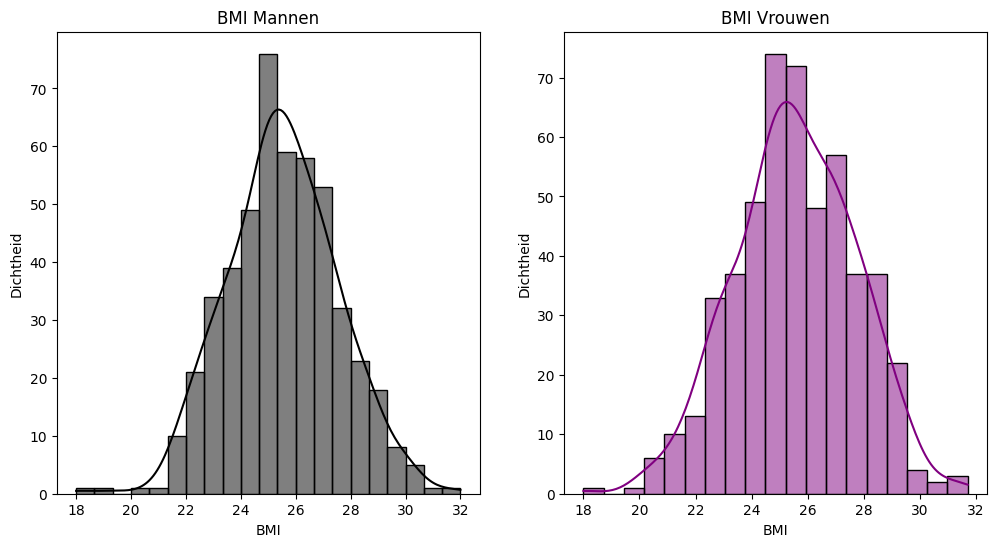

In [7]:
# b. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen..


# Splits de dataset op in mannen en vrouwen
dataset_mannen = dataset[dataset['Sex'] == 'Male']
dataset_vrouwen = dataset[dataset['Sex'] == 'Female']

# Functie om het percentage waarden binnen 1, 2 en 3 standaardafwijkingen te berekenen
def print_percentage_binnen_sigma(data):
    gemiddelde = data['BMI'].mean()
    standaardafwijking = data['BMI'].std()

    for sigma in range(1, 4):
        aantal_binnen_sigma = data[(data['BMI'] > (gemiddelde - sigma * standaardafwijking)) & (data['BMI'] < (gemiddelde + sigma * standaardafwijking))].shape[0]
        percentage_binnen_sigma = (aantal_binnen_sigma / data['BMI'].count()) * 100
        print(f'Percentage binnen {sigma} standaardafwijking(en): {percentage_binnen_sigma:.2f}%')

# Print de resultaten voor mannen en vrouwen
print('Mannen:')
print_percentage_binnen_sigma(dataset_mannen)
print('Vrouwen:')
print_percentage_binnen_sigma(dataset_vrouwen)

# Maak twee histogrammen: één voor mannen en één voor vrouwen
f, assen = plt.subplots(1, 2, figsize=(12, 6))

# Histogram BMI Mannen
sns.histplot(dataset_mannen['BMI'].values, kde=True, color='black', ax=assen[0])
assen[0].set_title('BMI Mannen')
assen[0].set_xlabel('BMI')
assen[0].set_ylabel('Dichtheid')

# Histogram BMI Vrouwen
sns.histplot(dataset_vrouwen['BMI'].values, kde=True, color='purple', ax=assen[1])
assen[1].set_title('BMI Vrouwen')
assen[1].set_xlabel('BMI')
assen[1].set_ylabel('Dichtheid')

# Toon de grafieken
plt.show()


Code:
python
Copy
Edit
for sigma in range(1, 4):
Dit betekent: herhaal de volgende code voor sigma = 1, 2 en 3.

Dus je berekent straks het percentage binnen:

1 standaardafwijking

2 standaardafwijkingen

3 standaardafwijkingen

python
Copy
Edit
    aantal_binnen_sigma = data[(data['BMI'] > (gemiddelde - sigma * standaardafwijking)) & (data['BMI'] < (gemiddelde + sigma * standaardafwijking))].shape[0]
gemiddelde - sigma * standaardafwijking
→ Dit is de ondergrens voor dat sigma (bijv. 1, 2 of 3 standaardafwijkingen onder het gemiddelde).

gemiddelde + sigma * standaardafwijking
→ Dit is de bovengrens.

data[(data['BMI'] > ... ) & (data['BMI'] < ... )]
→ Dit filtert alleen de rijen waarin de BMI tussen ondergrens en bovengrens ligt.

.shape[0]
→ Dit telt hoeveel rijen dat zijn = het aantal mensen binnen ±sigma standaardafwijkingen.

python
Copy
Edit
    percentage_binnen_sigma = (aantal_binnen_sigma / data['BMI'].count()) * 100
Deel het aantal mensen binnen sigma door het totaal aantal mensen, en vermenigvuldig met 100.

Zo krijg je het percentage.

python
Copy
Edit
    print(f'Percentage binnen {sigma} standaardafwijking(en): {percentage_binnen_sigma:.2f}%')
.2f betekent: toon het percentage met 2 cijfers na de komma.

Je print iets zoals:

scss
Copy
Edit
Percentage binnen 1 standaardafwijking(en): 68.24%
Percentage binnen 2 standaardafwijking(en): 95.01%
Percentage binnen 3 standaardafwijking(en): 99.73%

Mannen:
Gemiddelde BMI: 25.53
Standaardafwijking BMI: 2.00
Vrouwen:
Gemiddelde BMI: 25.56
Standaardafwijking BMI: 2.16


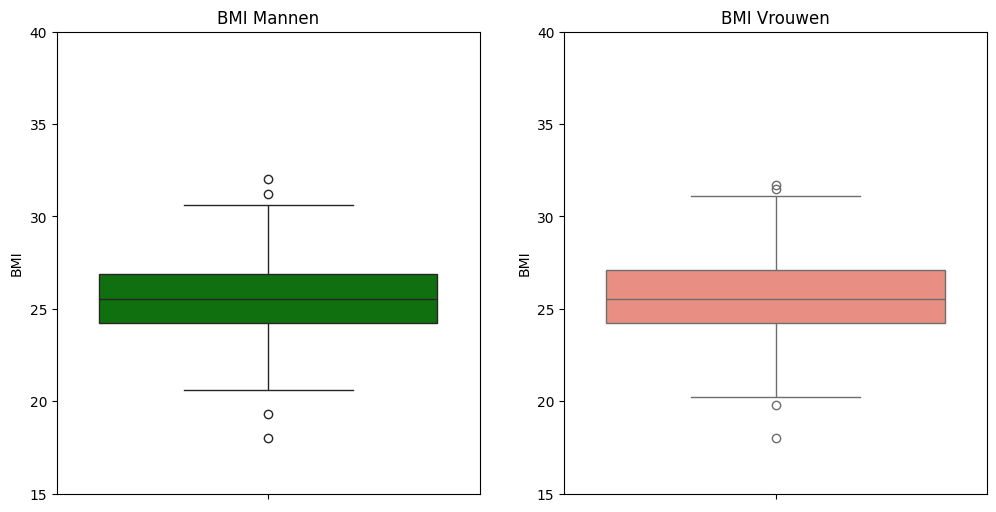

In [8]:


# Bereken het gemiddelde en de standaardafwijking voor mannen
gemiddelde_mannen = dataset[dataset['Sex'] == 'Male']['BMI'].mean()
standaardafwijking_mannen = dataset[dataset['Sex'] == 'Male']['BMI'].std()
print('Mannen:')
print(f"Gemiddelde BMI: {gemiddelde_mannen:.2f}")
print(f"Standaardafwijking BMI: {standaardafwijking_mannen:.2f}")

# Bereken het gemiddelde en de standaardafwijking voor vrouwen
gemiddelde_vrouwen = dataset[dataset['Sex'] == 'Female']['BMI'].mean()
standaardafwijking_vrouwen = dataset[dataset['Sex'] == 'Female']['BMI'].std()
print('Vrouwen:')
print(f"Gemiddelde BMI: {gemiddelde_vrouwen:.2f}")
print(f"Standaardafwijking BMI: {standaardafwijking_vrouwen:.2f}")

# Maak twee boxplots: één voor mannen en één voor vrouwen
f, assen = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot BMI Mannen
sns.boxplot(y=dataset_mannen['BMI'], whis=1.5, ax=assen[0], color='green')
assen[0].set_title('BMI Mannen')
assen[0].set(ylim=(15, 40))

# Boxplot BMI Vrouwen
sns.boxplot(y=dataset_vrouwen['BMI'], whis=1.5, ax=assen[1], color='salmon')
assen[1].set_title('BMI Vrouwen')
assen[1].set(ylim=(15, 40))

# Toon de grafieken
plt.show()


<ipython-input-28-325eb4ac0f0d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='BMI', data=dataset, palette=['green', 'purple'])


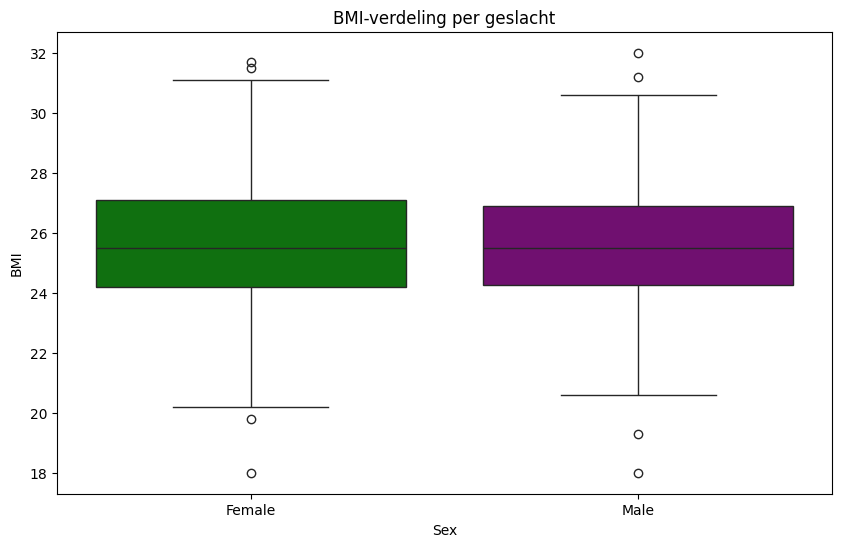

T-test: t=-0.19, p-waarde=0.8521


In [28]:
# c. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwenen? Verklaar ...
# Boxplots voor vergelijking



er is een klein verschil tussen de twee bmi's

neen er is geen groot verschil in de distrubutie van overgewicht tussen mannen en vrouwen het is ongeveer hetzelfde

In [10]:
# d. Hoeveel procent van de mannen in de dataset heeft minstens ernstig overgewicht en hoeveel procent vrouwen in de dataset?
# Percentage met ernstig overgewicht (BMI ≥ 30)
gemiddelde_mannen = dataset_mannen['BMI'].mean()
gemiddelde_vrouwen = dataset_vrouwen['BMI'].mean()

standaardafwijking_mannen = dataset_mannen['BMI'].std()
standaardafwijking_vrouwen = dataset_vrouwen['BMI'].std()

# Bereken het percentage mannen met BMI ≥ 30
percentage_mannen = stats.norm.sf(30, loc=gemiddelde_mannen, scale=standaardafwijking_mannen) * 100
print(f'Percentage mannen met ten minste ernstig overgewicht: {percentage_mannen:.2f}%')

# Bereken het percentage vrouwen met BMI ≥ 30
percentage_vrouwen = stats.norm.sf(30, loc=gemiddelde_vrouwen, scale=standaardafwijking_vrouwen) * 100
print(f'Percentage vrouwen met ten minste ernstig overgewicht: {percentage_vrouwen:.2f}%')

Percentage mannen met ten minste ernstig overgewicht: 1.28%
Percentage vrouwen met ten minste ernstig overgewicht: 1.97%


at doet deze regel?
stats.norm.sf(...)

sf staat voor survival function.

Dit berekent de kans dat een waarde groter is dan wat je opgeeft.

Hier: de kans dat BMI ≥ 30, dus: hoeveel mensen hebben minstens zo'n hoge BMI.

30

Dat is de grens voor ernstig overgewicht. Alles 30 of hoger telt mee.

loc=gemiddelde_mannen

Dit is het gemiddelde BMI van de mannen (μ).

We nemen aan dat het BMI normaal verdeeld is rond dit gemiddelde.

scale=standaardafwijking_mannen

Dit is de spreiding van de BMI-waarden (σ).

Hoe meer spreiding, hoe meer mensen er ver van het gemiddelde kunnen zitten.

* 100

We maken van de kans een percentage

we gebruiken cdf wnat het is cumulatief

In [9]:
# e. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met
# Aantal mannen met ernstig overgewicht (BMI ≥ 30)
aantal_mannen_ernstig_overgewicht = dataset_mannen[dataset_mannen['BMI'] >= 30].shape[0]

# Aantal vrouwen met ernstig overgewicht (BMI ≥ 30)
aantal_vrouwen_ernstig_overgewicht = dataset_vrouwen[dataset_vrouwen['BMI'] >= 30].shape[0]

# Percentage mannen met ernstig overgewicht
percentage_mannen_ernstig_overgewicht = (aantal_mannen_ernstig_overgewicht / dataset_mannen['BMI'].count()) * 100

# Percentage vrouwen met ernstig overgewicht
percentage_vrouwen_ernstig_overgewicht = (aantal_vrouwen_ernstig_overgewicht / dataset_vrouwen['BMI'].count()) * 100

# Print de resultaten
print(f"Aantal mannen met ernstig overgewicht: {aantal_mannen_ernstig_overgewicht}")
print(f"Aantal vrouwen met ernstig overgewicht: {aantal_vrouwen_ernstig_overgewicht}")
print(f"Percentage mannen met ernstig overgewicht: {percentage_mannen_ernstig_overgewicht:.2f}%")
print(f"Percentage vrouwen met ernstig overgewicht: {percentage_vrouwen_ernstig_overgewicht:.2f}%")


Aantal mannen met ernstig overgewicht: 7
Aantal vrouwen met ernstig overgewicht: 6
Percentage mannen met ernstig overgewicht: 1.43%
Percentage vrouwen met ernstig overgewicht: 1.19%


In [11]:
# f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht?
#    En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie.
# Bereken het percentage mannen met ondergewicht (BMI < 18.5)
percentage_mannen = stats.norm.cdf(18.5, loc=gemiddelde_mannen, scale=standaardafwijking_mannen) * 100
print(f'Percentage mannen met ondergewicht: {percentage_mannen:.4f}%')

# Bereken het percentage vrouwen met ondergewicht (BMI < 18.5)
percentage_vrouwen = stats.norm.cdf(18.5, loc=gemiddelde_vrouwen, scale=standaardafwijking_vrouwen) * 100
print(f'Percentage vrouwen met ondergewicht: {percentage_vrouwen:.4f}%')

Percentage mannen met ondergewicht: 0.0222%
Percentage vrouwen met ondergewicht: 0.0539%


In [12]:
# g. Ga na of er uitschieters in de dataset aanwezig zijn.
#    Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen
#    van het gemiddelde liggen.
# Bereken de bovengrens en ondergrens voor uitschieters (meer dan 3 standaardafwijkingen van het gemiddelde)
bovengrens = gemiddelde + 3 * standaardafwijking
ondergrens = gemiddelde - 3 * standaardafwijking

# Selecteer de rijen waar BMI een uitschieter is
uitschieters = dataset[(dataset['BMI'] < ondergrens) | (dataset['BMI'] > bovengrens)]

# Bekijk de eerste paar uitschieters
uitschieters.head()

# Tel het aantal uitschieters
uitschieters = uitschieters['BMI'].count()

# Print het aantal uitschieters
print('Er zijn', uitschieters, 'uitschieters')


Er zijn 3 uitschieters


## Vraag 5
Een kledingfabrikant wil een nieuwe riem op de markt brengen. Er is een variant voor Malenen en een variant voor Femaleen. Elke variant komt in smal, medium en large.
Elk soort riem is qua lengte als volgt verstelbaar:


|      Variant       | Mannen| Vrouwen |
|------------|-----|---------------|
| Smal |  Van 75 cm tot 87 cm|  Van 73 cm tot 85 cm|
| Medium | Van 85 cm tot 100 cm| Van 80 cm tot 95 cm|
| Large | Van 97 cm tot 110 cm  | Van 90 cm tot 107 cm|


Om een inschatting te kunnen maken van de productieaantallen laat de fabrikant een onderzoek uitvoeren naar de heupomtrek bij Malenen en Femaleen. De gegevens kan je terugvinden onder het bestand 'riemen.csv'.


In [13]:
dataset = pd.read_csv('riemen.csv')
dataset.head()

,Heupomtrek,Geslacht
0,93.5,M
1,94.8,M
2,95.0,M
3,94.0,M
4,98.5,M


a. Ga na of deze data normaalverdeeld is. Doe dit door de kansverdeling te plotten en door na te gaan hoeveel procent van de gegevens binnen de 1, 2 en 3 standaardafwijkingen is gelegen. Vergelijk met de werkelijke normaalverdeling die hoort bij het berekende gemiddelde en standaardafwijking.  Doe de analyse ook apart voor mannen en vrouwen.

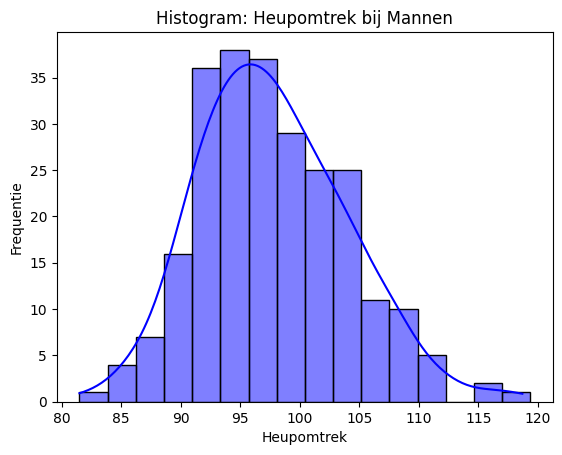

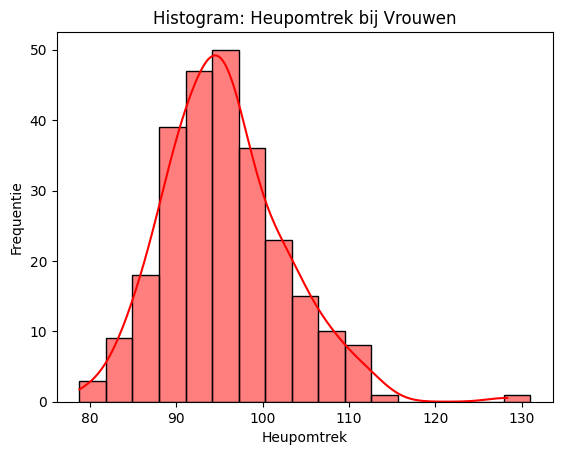

In [14]:


# Splits de dataset op in mannen en vrouwen
dataset_mannen = dataset[dataset.Geslacht == "M"]
dataset_vrouwen = dataset[dataset.Geslacht == "V"]

# Bereken het bereik en de klassebreedte voor mannen
max_mannen = dataset_mannen["Heupomtrek"].max()
min_mannen = dataset_mannen["Heupomtrek"].min()
bereik_mannen = max_mannen - min_mannen
klassebreedte_mannen = bereik_mannen / np.sqrt(dataset_mannen.shape[0])
bins_mannen = np.arange(start=min_mannen, stop=max_mannen + klassebreedte_mannen, step=klassebreedte_mannen)

# Histogram mannen
sns.histplot(data=dataset_mannen, x='Heupomtrek', bins=bins_mannen, color='blue', kde=True)
plt.title("Histogram: Heupomtrek bij Mannen")
plt.xlabel("Heupomtrek")
plt.ylabel("Frequentie")
plt.show()

# Herhaal voor vrouwen
max_vrouwen = dataset_vrouwen["Heupomtrek"].max()
min_vrouwen = dataset_vrouwen["Heupomtrek"].min()
bereik_vrouwen = max_vrouwen - min_vrouwen
klassebreedte_vrouwen = bereik_vrouwen / np.sqrt(dataset_vrouwen.shape[0])
bins_vrouwen = np.arange(start=min_vrouwen, stop=max_vrouwen + klassebreedte_vrouwen, step=klassebreedte_vrouwen)

sns.histplot(data=dataset_vrouwen, x='Heupomtrek', bins=bins_vrouwen, color='red', kde=True)
plt.title("Histogram: Heupomtrek bij Vrouwen")
plt.xlabel("Heupomtrek")
plt.ylabel("Frequentie")
plt.show()


Mannen:
Gemiddelde Heupomtrek: 97.76
Standaardafwijking Heupomtrek: 6.23
Vrouwen:
Gemiddelde Heupomtrek: 95.65
Standaardafwijking Heupomtrek: 6.94


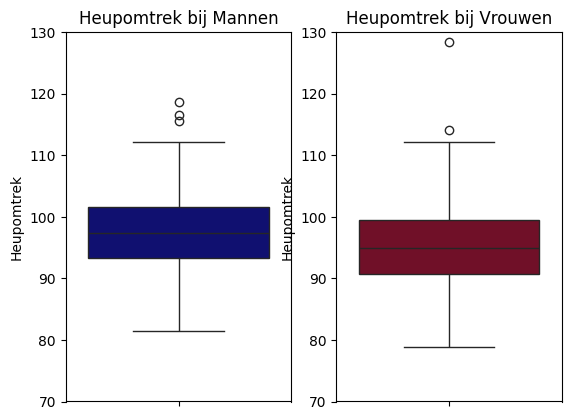

In [15]:
# b. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen..


# Bereken het gemiddelde en de standaardafwijking van de heupomtrek voor mannen
gemiddelde_mannen_heup = dataset[dataset['Geslacht'] == 'M']['Heupomtrek'].mean()
standaardafwijking_mannen_heup = dataset[dataset['Geslacht'] == 'M']['Heupomtrek'].std()
print('Mannen:')
print(f"Gemiddelde Heupomtrek: {gemiddelde_mannen_heup:.2f}")
print(f"Standaardafwijking Heupomtrek: {standaardafwijking_mannen_heup:.2f}")

# Bereken het gemiddelde en de standaardafwijking van de heupomtrek voor vrouwen
gemiddelde_vrouwen_heup = dataset[dataset['Geslacht'] == 'V']['Heupomtrek'].mean()
standaardafwijking_vrouwen_heup = dataset[dataset['Geslacht'] == 'V']['Heupomtrek'].std()
print('Vrouwen:')
print(f"Gemiddelde Heupomtrek: {gemiddelde_vrouwen_heup:.2f}")
print(f"Standaardafwijking Heupomtrek: {standaardafwijking_vrouwen_heup:.2f}")

# Splits de dataset op in mannen en vrouwen
dataset_mannen = dataset[dataset['Geslacht'] == "M"]
dataset_vrouwen = dataset[dataset['Geslacht'] == "V"]

# Maak boxplots voor de heupomtrek van mannen en vrouwen
f, assen = plt.subplots(1, 2)

sns.boxplot(y='Heupomtrek', data=dataset_mannen, whis=1.5, ax=assen[0], color='#000080')
sns.boxplot(y='Heupomtrek', data=dataset_vrouwen, whis=1.5, ax=assen[1], color='#800020')

# Stel de limieten en titels in voor de boxplots
assen[0].set(ylim=(70, 130))
assen[1].set(ylim=(70, 130))
assen[0].set_title("Heupomtrek bij Mannen")
assen[1].set_title("Heupomtrek bij Vrouwen")

plt.show()


c. In de veronderstelling dat de data normaalverdeeld is, bereken telkens **voor de populatie** hoeveel procent van de mannen maat smal, medium en large kan dragen. Doe dit ook voor Vrouwen. Vul daarbij onderstaande tabel aan.

|       Variant     | Mannen| Vrouwen |
|------------|-----:|---------------:|
| Smal |     %|     %|
| Medium |     %|     %|
| Large |      %|     %|
| Smal |  Van 75 cm tot 87 cm|  Van 73 cm tot 85 cm|
| Medium | Van 85 cm tot 100 cm| Van 80 cm tot 95 cm|
| Large | Van 97 cm tot 110 cm  | Van 90 cm tot 107 cm|

In [16]:
# Splits de dataset op in mannen en vrouwen
dataset_mannen = dataset[dataset['Geslacht'] == 'M']
dataset_vrouwen = dataset[dataset['Geslacht'] == 'V']

# Bereken het gemiddelde en de standaardafwijking van de heupomtrek
gemiddelde_mannen = dataset_mannen['Heupomtrek'].mean()
gemiddelde_vrouwen = dataset_vrouwen['Heupomtrek'].mean()

standaardafwijking_mannen = dataset_mannen['Heupomtrek'].std()
standaardafwijking_vrouwen = dataset_vrouwen['Heupomtrek'].std()

# Bereken de percentages per categorie
kleine_mannen = (stats.norm.cdf(87, loc=gemiddelde_mannen, scale=standaardafwijking_mannen) -
                 stats.norm.cdf(75, loc=gemiddelde_mannen, scale=standaardafwijking_mannen)) * 100

middelgrote_mannen = (stats.norm.cdf(100, loc=gemiddelde_mannen, scale=standaardafwijking_mannen) -
                      stats.norm.cdf(85, loc=gemiddelde_mannen, scale=standaardafwijking_mannen)) * 100

grote_mannen = (stats.norm.cdf(110, loc=gemiddelde_mannen, scale=standaardafwijking_mannen) -
                stats.norm.cdf(91, loc=gemiddelde_mannen, scale=standaardafwijking_mannen)) * 100

print(f"Percentage kleine mannen: {kleine_mannen:.2f}%")
print(f"Percentage middelgrote mannen: {middelgrote_mannen:.2f}%")
print(f"Percentage grote mannen: {grote_mannen:.2f}%")

Percentage kleine mannen: 4.18%
Percentage middelgrote mannen: 62.00%
Percentage grote mannen: 83.65%


We berekenen hoeveel mannen tussen 75 en 87 cm heupomtrek zitten.

Dat is: alles ≤87 min alles ≤75 → dus alleen het stuk tussen 75 en 87 cm.

Daarna doen we * 100 om het als percentage uit te drukken. idem dit voor ≤100 min alles ≤85 en110 en 91



d. Bij hoeveel procent van de mannen past zowel smal als medium?

In [17]:
# Bereken het percentage mannen met een heupomtrek tussen 75 cm en 100 cm
percentage_mannen = (stats.norm.cdf(100, loc=gemiddelde_mannen, scale=standaardafwijking_mannen) -
                     stats.norm.cdf(75, loc=gemiddelde_mannen, scale=standaardafwijking_mannen)) * 100

print(f'Percentage mannen dat in medium past: {percentage_mannen:.2f}%')


Percentage mannen dat in medium past: 64.01%


e. Bij hoeveel procent van de vrouwen past zowel medium als large?

In [18]:
percentage_vrouwen = (stats.norm.cdf(107, loc=gemiddelde_vrouwen, scale=standaardafwijking_vrouwen) -
                      stats.norm.cdf(80, loc=gemiddelde_vrouwen, scale=standaardafwijking_vrouwen)) * 100

print(f'Percentage vrouwen dat zowel in medium als large past: {percentage_vrouwen:.2f}%')

Percentage vrouwen dat zowel in medium als large past: 93.69%


f. Bij hoeveel procent van de mannen past geen enkele maat?

In [19]:
te_klein = stats.norm.cdf(75, loc=gemiddelde_mannen, scale=standaardafwijking_mannen)
te_groot = stats.norm.sf(110, loc=gemiddelde_mannen, scale=standaardafwijking_mannen)
past_niet = (te_klein + te_groot) * 100

print(f'Percentage mannen dat in geen enkele maat past: {past_niet:.2f}%')


Percentage mannen dat in geen enkele maat past: 2.48%


Samenvatting in simpele taal:
Links (te klein) → je gebruikt cdf(): alles onder een bepaalde waarde.

Rechts (te groot) → je gebruikt sf(): alles boven een bepaalde waarde.

Daarom dus:
✅ cdf(75) voor te klein
✅ sf(110) voor te groot

Wil je dat ik ook laat zien hoe je dit grafisch kunt weergeven?2. stats.norm.sf(110, ...)
Dit geeft de kans dat iemand groter is dan 110 cm
→ Dat is het percentage dat te groot is.

➡️ Daarom gebruik je sf (= survival function) bij de rechterkant van het bereik.



g. Bij hoeveel procent van de vrouwen past geen enkele maat?

In [20]:
te_klein = stats.norm.cdf(73, loc=gemiddelde_vrouwen, scale=standaardafwijking_vrouwen)
te_groot = stats.norm.sf(107, loc=gemiddelde_vrouwen, scale=standaardafwijking_vrouwen)
past_niet = (te_klein + te_groot) * 100

print(f'Percentage vrouwen dat in geen enkele maat past: {past_niet:.2f}%')


Percentage vrouwen dat in geen enkele maat past: 5.16%
